## STEP 02: Ice Divide Project - ICESat-2 ATL11 Data Preparation for Surface Fitting 
## Download ICESat-2 ATL11 data using icepyx and prepare data for surface fitting

This section of the notebook is tailored for the ICESat-2 HackWeek 2024 project "off-track" (https://github.com/ICESAT-2HackWeek/off_track/) and is a minor modification of the 2024 HackWeek tutorial:  

https://icesat-2-2024.hackweek.io/tutorials/data_access/ICESat2_Data_Access_Tutorial.html

# Merge and window multiple ATL11 data files into a single HDF5 file 

In [1]:
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import pointCollection as pc
import glob

In [2]:
# set output file name and search pattern
f_name_search = "/home/jovyan/shared-public/off_track/michael/n_grn_prudhoe_lobe_ll.geojson"
f_name_out    = '/home/jovyan/shared-public/off_track/michael/ATL11/n_grn/n_grn_merged_ATL11.h5'
f_list_ATL11  = "/home/jovyan/shared-public/off_track/michael/ATL11/n_grn/*.h5"

In [3]:
# loop over all ATL11 .h5 file and merge them into a single list

verbose = False

D11 = [] # create empty list

for file in glob.glob(f_list_ATL11):
    if verbose:
        print(file)    
    for pair in [1, 2, 3]:
        try:
            D11 += [pc.ATL11.data(pair=pair).from_h5(file)] # successively add data to D11 list
        except Exception as e:                              # for trying to read beam pairs not covering the search area
            print(e)
    

'data' object has no attribute 'latitude'
'data' object has no attribute 'latitude'
"Unable to synchronously open object (object 'pt1' doesn't exist)"
"Unable to synchronously open object (object 'pt2' doesn't exist)"
"Unable to synchronously open object (object 'pt3' doesn't exist)"
'data' object has no attribute 'latitude'
'data' object has no attribute 'latitude'
'data' object has no attribute 'latitude'
'data' object has no attribute 'latitude'
'data' object has no attribute 'latitude'
'data' object has no attribute 'latitude'
'data' object has no attribute 'latitude'


In [4]:
# see what's in the merged data list
D11[0]

<class 'pointCollection.ATL11.data.data'> with shape (64, 21),
with fields:
['latitude', 'longitude', 'h_corr', 'h_corr_sigma', 'h_corr_sigma_systematic', 'delta_time', 'quality_summary', 'ref_pt', 'dem_h', 'x_atc', 'fit_quality', 'cycle_number']

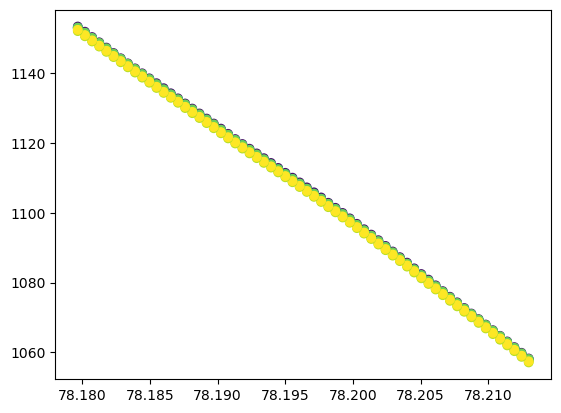

In [5]:
# make simple QC plot of first segment

D = D11[0]
plt.figure()
plt.scatter(D.latitude, D.h_corr, c=D.delta_time)

In [6]:
# merge files
D_full = pc.data().from_list(D11)

In [7]:
# add projected coordinates
D_full.get_xy(EPSG=3413)

<class 'pointCollection.data.data'> with shape (260463,),
with fields:
['latitude', 'longitude', 'h_corr', 'h_corr_sigma', 'h_corr_sigma_systematic', 'delta_time', 'quality_summary', 'ref_pt', 'dem_h', 'x_atc', 'fit_quality', 'cycle_number', 'x', 'y']

In [8]:
# need to crop icepyx return to actual search box

df=gpd.read_file(f_name_search).to_crs(3413)
xy=np.array(df.geometry[0].exterior.coords)
D_full.crop([[np.min(xy[:,0]), np.max(xy[:,0])], [np.min(xy[:,1]), np.max(xy[:,1])]])

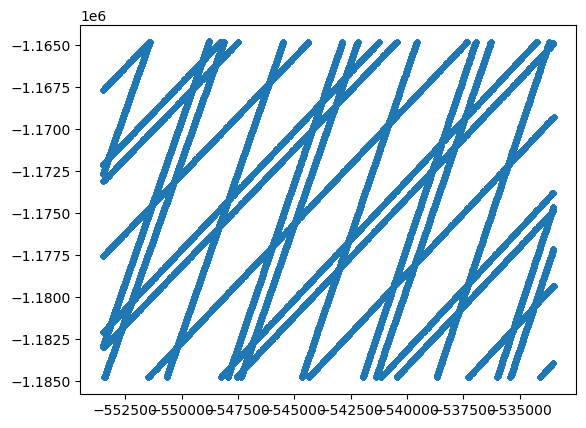

In [9]:
# make simple QC plot
plt.figure
plt.plot(D_full.x.ravel(),D_full.y.ravel(),'.')

In [10]:
# save merged data into a single HDF5 file

D_full.to_h5(f_name_out)

In [11]:
print(f'Exported {D_full.shape[0]:d} data points found inside search polygon.')

Exported 149310 data points found inside search polygon.
